# Importando a Biblioteca


In [89]:

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
import squarify 
import os
import numpy as np
import matplotlib.ticker as mticker
import seaborn as sns
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__) 
print("Seaborn version:", sns.__version__)
print("Bibliotecas instaladas com sucesso no ambiente virtual!")

Pandas version: 2.3.1
Matplotlib version: 3.10.3
Seaborn version: 0.13.2
Bibliotecas instaladas com sucesso no ambiente virtual!


## Importando DataFrames 

In [63]:

try:
    americanas = pd.read_csv("zProjeto_Final/Datasets/Americanas.csv", sep=',', encoding='utf-8')
    comercio = pd.read_csv("zProjeto_Final/Datasets/Comercio.csv", sep=',', encoding='utf-8')
    economia = pd.read_csv("zProjeto_Final/Datasets/dados_economicos.csv", sep=',', encoding='utf-8')
    exportacao = pd.read_csv("zProjeto_Final/Datasets/Exportacao.csv", sep=',', encoding='utf-8')
    importacao = pd.read_csv("zProjeto_Final/Datasets/Importacao.csv", sep=',', encoding='utf-8')
    producao = pd.read_csv("zProjeto_Final/Datasets/Producao.csv", sep=',', encoding='utf-8')
    clima = pd.read_csv("zProjeto_Final/Datasets/resumo_climatico.csv", sep=',', encoding='utf-8')
    semclass = pd.read_csv("zProjeto_Final/Datasets/Sem_Classificacao.csv", sep=',', encoding='utf-8')
    vinifera = pd.read_csv("zProjeto_Final/Datasets/Viniferas.csv", sep=',', encoding='utf-8')
    exportador_mundial = pd.read_csv("zProjeto_Final/Datasets/vinho_mundial_exportacao.csv", sep=';', encoding='utf-8')
    consumidor_mundial = pd.read_csv("zProjeto_Final/Datasets/consumidores_mundial.csv", sep=';', encoding='utf-8')

    print(" Todos os arquivos foram lidos com sucesso!")

except FileNotFoundError as e:
    print(f" Erro: O arquivo n√£o foi encontrado. Verifique o caminho: {e}")
except Exception as e:
    print(f" Ocorreu um erro ao ler um dos arquivos: {e}")

 Todos os arquivos foram lidos com sucesso!


### Todos os CSV j√° foram Manipulados e agora Importados, vamos come√ßar a gerar os relat√≥rios

# Grafico com os maiores exportadores de Vinho Mundial
Arquivo gerado atrav√©s da prospec√ß√£o de dados de International Organisation of Vine and Wine: https://www.oiv.int/what-we-do/statistics 

In [ ]:


# --- Configura√ß√µes Iniciais do Matplotlib para Estilo Profissional (Fundo BRANCO) ---
plt.style.use('seaborn-v0_8-whitegrid') # Fundo branco com grade sutil

plt.rcParams['figure.figsize'] = (16, 10) # Tamanho padr√£o da figura
plt.rcParams['font.size'] = 12 # Tamanho de fonte padr√£o
plt.rcParams['axes.labelsize'] = 14 # Tamanho dos r√≥tulos dos eixos
plt.rcParams['axes.titlesize'] = 18 # Tamanho dos t√≠tulos dos subplots

# Ajustar a cor do texto e elementos para ser vis√≠vel no fundo CLARO
plt.rcParams['text.color'] = 'dimgray' # Cor padr√£o do texto (cinza escuro)
plt.rcParams['axes.labelcolor'] = 'dimgray' # Cor dos r√≥tulos dos eixos
plt.rcParams['xtick.color'] = 'dimgray' # Cor dos ticks do eixo X
plt.rcParams['ytick.color'] = 'dimgray' # Cor dos ticks do eixo Y
plt.rcParams['axes.edgecolor'] = 'gray' # Borda dos eixos
plt.rcParams['grid.color'] = 'lightgray' # Cor da grade (mais suave)
plt.rcParams['grid.linestyle'] = '-' # Estilo da grade

print("Iniciando a gera√ß√£o do gr√°fico...")


if 'exportador_mundial' in locals() and not exportador_mundial.empty:
    if all(col in exportador_mundial.columns for col in ['Regiao/Pais', 'Ano', 'Produto', 'Quantidade (litros)']):

        # Filtrar para 'Vinho' e remover NaNs/zeros
        df_vinho_export = exportador_mundial[exportador_mundial['Produto'] == 'Vinho'].copy()
        df_vinho_export = df_vinho_export[
            (df_vinho_export['Quantidade (litros)'].notna()) &
            (df_vinho_export['Quantidade (litros)'] != 0)
        ].copy()

        if df_vinho_export.empty:
            print("‚ùå O DataFrame de exportadores de vinho est√° vazio ap√≥s as salvaguardas de filtragem. N√£o √© poss√≠vel gerar o gr√°fico.")
        else:
            # 1. Preparar dados: Total Exportado pelos Top Pa√≠ses
            total_exportado_por_pais = df_vinho_export.groupby('Regiao/Pais')['Quantidade (litros)'].sum().reset_index()

            top_n = 10 # Definir o n√∫mero de top exportadores
            # ORDENAR DO MAIOR PARA O MENOR (decrescente) antes de plotar
            top_exportadores_total = total_exportado_por_pais.nlargest(top_n, 'Quantidade (litros)').sort_values(by='Quantidade (litros)', ascending=False) 

            # 2. Criar o Gr√°fico de Barras HORIZONTAIS com Seaborn
            plt.figure(figsize=(14, 9)) # Ajusta o tamanho da figura
            ax = sns.barplot(
                x='Quantidade (litros)',
                y='Regiao/Pais',
                data=top_exportadores_total,
                palette='viridis_r', # Paleta de cores moderna INVERSA (verdes/amarelos no fundo claro)
                ax=plt.gca() # Garante que o seaborn desenhe no eixo atual do matplotlib
            )

            # 3. Adicionar T√≠tulo e R√≥tulos Aprimorados
            plt.title(f'Volume Total em Litros Exportado pelos Top {top_n} Pa√≠ses Mundiais', fontsize=22, fontweight='bold', color='black', pad=25) # T√≠tulo preto no fundo branco
            plt.xlabel('Volume Total Exportado (Litros)', fontsize=16, fontweight='semibold', color='dimgray')
            plt.ylabel('Pa√≠s', fontsize=16, fontweight='semibold', color='dimgray')

            # 4. Formata√ß√£o do Eixo X (Volume)
            def format_volume_labels(value, pos):
                if value >= 1_000_000_000:
                    return f'{value / 1_000_000_000:.1f} Bi L'
                elif value >= 1_000_000:
                    return f'{value / 1_000_000:.0f} Mi L'
                else:
                    return f'{value:,.0f} L'
            
            formatter_volume = plt.FuncFormatter(format_volume_labels)
            ax.xaxis.set_major_formatter(formatter_volume)
            ax.tick_params(axis='x', labelsize=12, colors='dimgray')
            ax.tick_params(axis='y', labelsize=12, colors='dimgray', length=0) # Remove ticks do Y


            # 5. Adicionar os valores exatos no final de cada barra com formata√ß√£o
            for p in ax.patches:
                value = p.get_width()
                
                if value >= 1_000_000_000:
                    text_label = f'{value / 1_000_000_000:.2f} Bi L' 
                elif value >= 1_000_000:
                    text_label = f'{value / 1_000_000:.2f} Mi L' 
                else:
                    text_label = f'{value:,.0f} L'

                ax.annotate(text_label,
                            (value, p.get_y() + p.get_height() / 2),
                            ha='left', va='center',
                            xytext=(5, 0), # Pequeno offset para o texto n√£o colar na barra
                            textcoords='offset points',
                            fontsize=10, color='dimgray', fontweight='bold') # Texto dos r√≥tulos em dimgray

            # 6. Remover bordas desnecess√°rias e ajustar grid
            ax.spines['top'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_color('gray')
            ax.spines['left'].set_color('gray')
            ax.xaxis.grid(True, linestyle='-', alpha=0.7, color='lightgray') # Grid horizontal no X
            ax.yaxis.grid(False) # Sem grid vertical no Y para n√£o cortar nomes

            plt.tight_layout() # Ajusta o layout para evitar cortes
            plt.show()

            print(f"\n‚úÖ Gr√°fico de Top Exportadores Mundiais gerado com sucesso com fundo BRANCO e ordem DECRESCENTE!")

    else:
        print("‚ùå ERRO: O DataFrame 'exportador_mundial' n√£o cont√©m todas as colunas esperadas para o gr√°fico ('Regiao/Pais', 'Ano', 'Produto', 'Quantidade (litros)').")
else:
    print("‚ùå ERRO: O DataFrame 'exportador_mundial' n√£o foi carregado ou est√° vazio. Por favor, verifique a c√©lula de importa√ß√£o inicial.")

Iniciando a gera√ß√£o do gr√°fico...


C:\Users\zirn\AppData\Local\Temp\ipykernel_24428\1246139346.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(



‚úÖ Gr√°fico de Top Exportadores Mundiais gerado com sucesso com fundo BRANCO e ordem DECRESCENTE!


## Paises que mais consomem Vinho no Mundo:

Iniciando a gera√ß√£o do gr√°fico de mapa de √°rvore (treemap) para os maiores CONSUMIDORES mundiais de vinho, com pa√≠ses traduzidos...
‚úÖ Nomes dos pa√≠ses na coluna 'Regiao/Pais' traduzidos para o treemap.


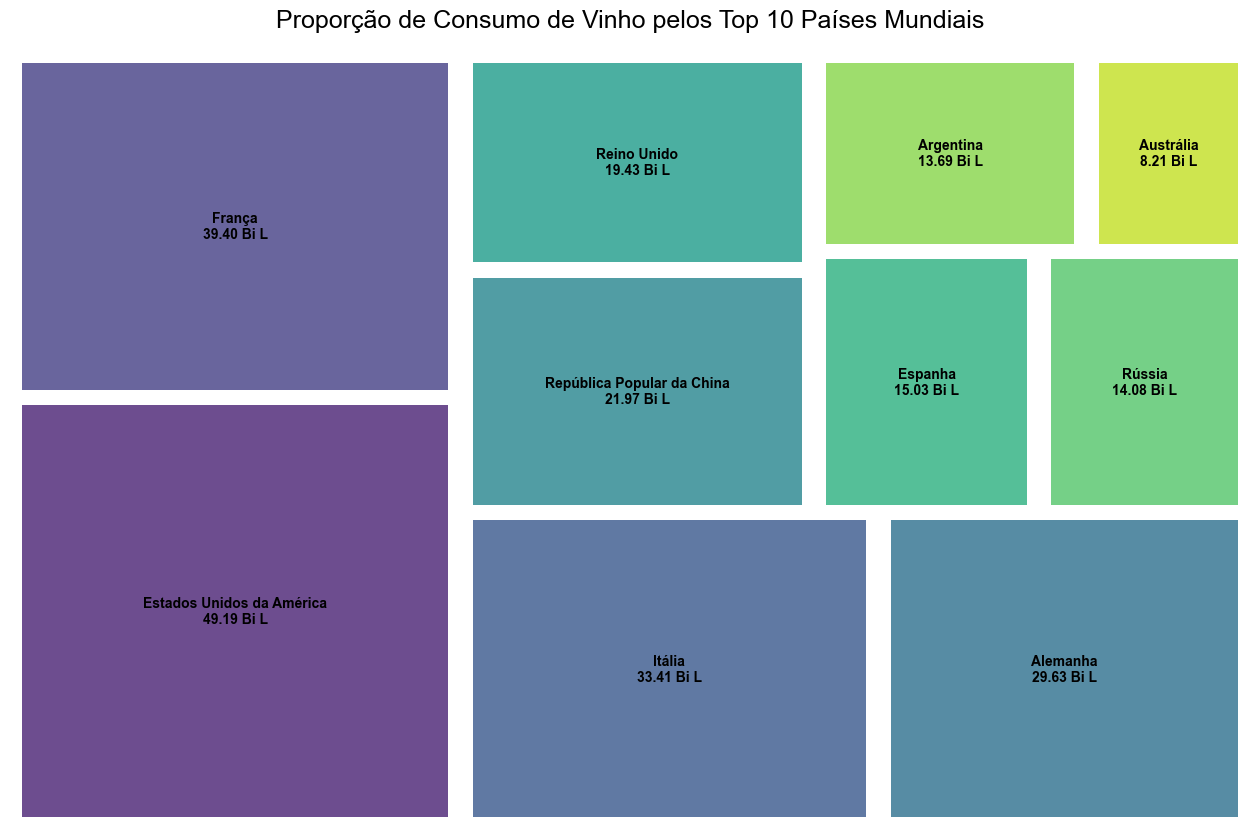


üéâ Gr√°fico de Mapa de √Årvore (Treemap) dos Top 10 Maiores CONSUMIDORES Mundiais de Vinho gerado com sucesso com fundo BRANCO!


In [ ]:

# --- Configura√ß√µes de Estilo para os Gr√°ficos (Fundo BRANCO) ---
# Remover plt.style.use('dark_background') para usar o fundo padr√£o (branco) ou 'seaborn-whitegrid'.
plt.style.use('seaborn-v0_8-whitegrid') # Estilo com fundo branco e grade leve

plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 12 # Ajustar para treemap
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 18

# Ajustar a cor do texto e elementos para ser vis√≠vel no fundo CLARO
plt.rcParams['text.color'] = 'dimgray' # Texto geral em cinza escuro
plt.rcParams['axes.labelcolor'] = 'dimgray' # R√≥tulos dos eixos em cinza escuro
plt.rcParams['xtick.color'] = 'dimgray' # Ticks do eixo X em cinza escuro
plt.rcParams['ytick.color'] = 'dimgray' # Ticks do eixo Y em cinza escuro
plt.rcParams['axes.edgecolor'] = 'gray' # Borda dos eixos em cinza
plt.rcParams['grid.color'] = 'lightgray' # Grade em cinza claro


# --- Mapeamento de Tradu√ß√£o de Pa√≠ses (Mantido) ---
country_translation_map = {
    'World': 'Mundo',
    'European Union': 'Uni√£o Europeia',
    'France': 'Fran√ßa',
    'Italy': 'It√°lia',
    'Spain': 'Espanha',
    'Chile': 'Chile',
    'Australia': 'Austr√°lia',
    'Germany': 'Alemanha',
    'United States': 'Estados Unidos',
    'United States of America': 'Estados Unidos da Am√©rica', 
    'New Zealand': 'Nova Zel√¢ndia',
    'Portugal': 'Portugal',
    'South Africa': '√Åfrica do Sul',
    'Argentina': 'Argentina',
    'China': 'China',
    "People's Republic of China": "Rep√∫blica Popular da China", 
    'United Kingdom': 'Reino Unido',
    'Canada': 'Canad√°',
    'Netherlands': 'Holanda',
    'Belgium': 'B√©lgica',
    'Austria': '√Åustria',
    'Greece': 'Gr√©cia',
    'Hungary': 'Hungria',
    'Switzerland': 'Su√≠√ßa',
    'Russia': 'R√∫ssia',
    'Japan': 'Jap√£o',
    'Brazil': 'Brasil',
    'Mexico': 'M√©xico',
    'Sweden': 'Su√©cia',
    'Denmark': 'Dinamarca',
    'Ireland': 'Irlanda',
    'Finland': 'Finl√¢ndia',
    'Norway': 'Noruega',
    'Poland': 'Pol√¥nia',
    'Czech Republic': 'Rep√∫blica Tcheca',
    'Slovakia': 'Eslov√°quia',
    'Romania': 'Rom√™nia',
    'Bulgaria': 'Bulg√°ria',
    'Croatia': 'Cro√°cia',
    'Slovenia': 'Eslov√™nia',
    'Serbia': 'S√©rvia',
    'Ukraine': 'Ucr√¢nia',
    'Moldova': 'Mold√°via',
    'Georgia': 'Ge√≥rgia',
    'Turkey': 'Turquia',
    'Israel': 'Israel',
    'Lebanon': 'L√≠bano',
    'Syria': 'S√≠ria',
    'Egypt': 'Egito',
    'Algeria': 'Arg√©lia',
    'Morocco': 'Marrocos',
    'Tunisia': 'Tun√≠sia',
    'India': '√çndia',
    'Indonesia': 'Indon√©sia',
    'Philippines': 'Filipinas',
    'South Korea': 'Coreia do Sul',
    'Thailand': 'Tail√¢ndia',
    'Vietnam': 'Vietn√£',
    'Malaysia': 'Mal√°sia',
    'Singapore': 'Singapura',
    'Hong Kong': 'Hong Kong',
    'Taiwan': 'Taiwan',
    'United Arab Emirates': 'Emirados √Årabes Unidos',
    'Saudi Arabia': 'Ar√°bia Saudita',
    'Qatar': 'Catar',
    'Kuwait': 'Kuwait',
    'Nigeria': 'Nig√©ria',
    'Kenya': 'Qu√™nia',
    'Ethiopia': 'Eti√≥pia',
    'Tanzania': 'Tanz√¢nia',
    'Uganda': 'Uganda',
    'Ghana': 'Gana',
    'Colombia': 'Col√¥mbia',
    'Peru': 'Peru',
    'Venezuela': 'Venezuela',
    'Ecuador': 'Equador',
    'Bolivia': 'Bol√≠via',
    'Paraguay': 'Paraguai',
    'Uruguay': 'Uruguai',
    'Cuba': 'Cuba',
    'Dominican Republic': 'Rep√∫blica Dominicana',
    'Puerto Rico': 'Porto Rico',
    'Jamaica': 'Jamaica',
    'Trinidad and Tobago': 'Trinidad e Tobago',
    'Iceland': 'Isl√¢ndia',
    'Luxembourg': 'Luxemburgo',
    'Malta': 'Malta',
    'Cyprus': 'Chipre',
    'Albania': 'Alb√¢nia',
    'Bosnia and Herzegovina': 'B√≥snia e Herzegovina',
    'North Macedonia': 'Maced√¥nia do Norte',
    'Montenegro': 'Montenegro',
    'Kosovo': 'Kosovo',
    'Lithuania': 'Litu√¢nia',
    'Latvia': 'Let√¥nia',
    'Estonia': 'Est√¥nia',
    'Belarus': 'Belarus',
    'Azerbaijan': 'Azerbaij√£o',
    'Kazakhstan': 'Cazaquist√£o',
    'Uzbekistan': 'Uzbequist√£o',
    'Afghanistan': 'Afeganist√£o',
    'Republic of Turkiye': 'Turquia',
    'Republic of North Macenoia': 'Maced√¥nia do Norte',
    'new zealand': 'Nova Zel√¢ndia',
    'Republic of T√ºrkiye': 'Turquia',
    'reublic of north macenoia': 'Maced√¥nia do Norte',
    'Belarus' : 'Bielorr√∫ssia'
}


print("Iniciando a gera√ß√£o do gr√°fico de mapa de √°rvore (treemap) para os maiores CONSUMIDORES mundiais de vinho, com pa√≠ses traduzidos...")

# Verificar se o DataFrame 'consumidor_mundial' existe e cont√©m as colunas esperadas
if 'consumidor_mundial' in locals() and not consumidor_mundial.empty:
    # Criar uma c√≥pia para as transforma√ß√µes do gr√°fico
    df_para_treemap = consumidor_mundial.copy()

    # *** Aplicar a tradu√ß√£o dos nomes dos pa√≠ses aqui ***
    if 'Regiao/Pais' in df_para_treemap.columns:
        df_para_treemap['Regiao/Pais'] = df_para_treemap['Regiao/Pais'].replace(country_translation_map)
        print("‚úÖ Nomes dos pa√≠ses na coluna 'Regiao/Pais' traduzidos para o treemap.")
    else:
        print("‚ùå ERRO: Coluna 'Regiao/Pais' n√£o encontrada para tradu√ß√£o de pa√≠ses no treemap.")


    # Salvaguardas finais 
    df_vinho_consumo_filtrado = df_para_treemap[df_para_treemap['Produto'] == 'Vinho'].copy()
    df_vinho_consumo_filtrado = df_vinho_consumo_filtrado[
        (df_vinho_consumo_filtrado['Quantidade (litros)'].notna()) &
        (df_vinho_consumo_filtrado['Quantidade (litros)'] != 0)
    ].copy()

    if df_vinho_consumo_filtrado.empty:
        print("‚ùå O DataFrame 'consumidor_mundial' est√° vazio ap√≥s as salvaguardas de filtragem para vinho/quantidades v√°lidas. N√£o √© poss√≠vel gerar o treemap.")
    else:
        # 1. Preparar dados para o Treemap: Total Consumido pelos Top Pa√≠ses
        total_consumido_por_pais = df_vinho_consumo_filtrado.groupby('Regiao/Pais')['Quantidade (litros)'].sum().reset_index()

        top_n = 10 # Definir o n√∫mero de top consumidores para o treemap
        top_consumidores_treemap = total_consumido_por_pais.nlargest(top_n, 'Quantidade (litros)')

        # Gerar r√≥tulos personalizados para o treemap: Pa√≠s e Quantidade
        labels = []
        for index, row in top_consumidores_treemap.iterrows():
            country = row['Regiao/Pais']
            value = row['Quantidade (litros)']
            if value >= 1_000_000_000:
                labels.append(f'{country}\n{value / 1_000_000_000:.2f} Bi L')
            elif value >= 1_000_000:
                labels.append(f'{country}\n{value / 1_000_000:.0f} Mi L')
            else:
                labels.append(f'{country}\n{value:,.0f} L')

        sizes = top_consumidores_treemap['Quantidade (litros)'].tolist()
        # Usar uma paleta de cores adequada para fundo CLARO, como 'viridis' ou 'crest'
        # 'viridis' (tons de azul-verde) ou 'YlGnBu' (amarelo-verde-azul) s√£o boas op√ß√µes para caixas no fundo branco
        colors = sns.color_palette('viridis', n_colors=len(sizes)).as_hex() 


        # 2. Criar o Treemap
        plt.figure(figsize=(16, 10))
        squarify.plot(
            sizes=sizes,
            label=labels,
            color=colors,
            alpha=0.8,
            pad=True,
            text_kwargs={'fontsize':10, 'color':'black', 'fontweight':'bold'} # Texto das caixas em PRETO
        )

        plt.title(f'Propor√ß√£o de Consumo de Vinho pelos Top {top_n} Pa√≠ses Mundiais', fontsize=18, pad=20, color='black') # T√≠tulo em PRETO
        plt.axis('off') # Remover os eixos para o treemap
        plt.show()

        print(f"\nüéâ Gr√°fico de Mapa de √Årvore (Treemap) dos Top {top_n} Maiores CONSUMIDORES Mundiais de Vinho gerado com sucesso com fundo BRANCO!")

else:
    print("‚ùå ERRO: O DataFrame 'consumidor_mundial' n√£o foi carregado ou est√° vazio. Por favor, verifique a c√©lula de importa√ß√£o inicial.")
    print("Certifique-se de que 'consumidor_mundial' cont√©m as colunas: 'Regiao/Pais', 'Ano', 'Produto', 'Quantidade (litros)'.")


## Agora vamos falar dos dados gerais de Exportacao da V√≠nicula

In [ ]:

# Configura√ß√µes para exibir todas as linhas e colunas (opcional, para depura√ß√£o)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# --- ASSUMINDO que o DataFrame 'exportacao' J√Å EST√Å CARREGADO E PRONTO. ---
# As colunas esperadas s√£o: 'Pa√≠s', 'Ano', 'Quantidade (kg)', 'Valor_USD'.

# Assegura que 'Ano', 'Quantidade (kg)' e 'Valor_USD' s√£o num√©ricos.
exportacao['Ano'] = pd.to_numeric(exportacao['Ano'], errors='coerce')
exportacao['Quantidade (kg)'] = pd.to_numeric(exportacao['Quantidade (kg)'], errors='coerce')
exportacao['Valor_USD'] = pd.to_numeric(exportacao['Valor_USD'], errors='coerce')

# Remove linhas com valores nulos ap√≥s a convers√£o.
exportacao.dropna(subset=['Ano', 'Quantidade (kg)', 'Valor_USD', 'Pa√≠s'], inplace=True)
exportacao['Ano'] = exportacao['Ano'].astype(int)

# --- Filtrar pelos √∫ltimos 15 anos ---
ano_atual = exportacao['Ano'].max()
ano_inicial = ano_atual - 14

df_recentes = exportacao[exportacao['Ano'] >= ano_inicial].copy()

# --- Agrega os dados por Pa√≠s ---
resumo_pais = df_recentes.groupby('Pa√≠s').agg(
    Valor_Total=('Valor_USD', 'sum'),
    Quantidade_Total_Kg=('Quantidade (kg)', 'sum')
).sort_values(by='Valor_Total', ascending=False).reset_index()

# --- Exibe o resumo agregado e os totais gerais (mantido para verifica√ß√£o dos dados) ---
print("\n--- Resumo da Exporta√ß√£o por Pa√≠s (√öltimos 15 Anos) ---")
print(resumo_pais.to_markdown(index=False, numalign="left", stralign="left"))

print(f"\n--- Totais Gerais para os √öltimos 15 Anos ({ano_inicial}-{ano_atual}) ---")
valor_total_geral = resumo_pais['Valor_Total'].sum()
quantidade_total_geral = resumo_pais['Quantidade_Total_Kg'].sum()
print(f"Valor Total: {valor_total_geral:,.2f} USD")
print(f"Quantidade Total (Kg): {quantidade_total_geral:,.2f} Kg")

# --- Prepara os dados para os gr√°ficos ---
n_top_paises = 25 # Top 25 pa√≠ses
top_paises_valor = resumo_pais.sort_values(by='Valor_Total', ascending=False).head(n_top_paises)
top_paises_quantidade = resumo_pais.sort_values(by='Quantidade_Total_Kg', ascending=False).head(n_top_paises)


# --- Configura√ß√µes de estilo do Matplotlib para "fundo BRANCO e cores vibrantes" ---
plt.style.use('seaborn-v0_8-whitegrid') # Fundo branco com grade suave
# plt.rcParams['figure.figsize'] = (16, 10) # J√° definido acima ou no inicio do seu script
# plt.rcParams['font.size'] = 12
# plt.rcParams['axes.labelsize'] = 14
# plt.rcParams['axes.titlesize'] = 18

# Ajustar a cor do texto e elementos para ser vis√≠vel no fundo CLARO
plt.rcParams['text.color'] = 'dimgray' # Texto geral em cinza escuro
plt.rcParams['axes.labelcolor'] = 'dimgray' # R√≥tulos dos eixos em cinza escuro
plt.rcParams['xtick.color'] = 'dimgray' # Ticks do eixo X em cinza escuro
plt.rcParams['ytick.color'] = 'dimgray' # Ticks do eixo Y em cinza escuro
plt.rcParams['axes.edgecolor'] = 'gray' # Borda dos eixos em cinza
plt.rcParams['grid.color'] = 'lightgray' # Cor da grade (mais suave)
plt.rcParams['grid.linestyle'] = '-' # Estilo da grade (cont√≠nua)


# Paletas de cores para fundo CLARO (invertidas ou adequadas)
colors_value_tech = plt.cm.viridis(np.linspace(0.2, 0.8, n_top_paises)) # Tons de azul-verde
colors_quantity_tech = plt.cm.plasma(np.linspace(0.2, 0.8, n_top_paises)) # Tons de roxo-laranja (bom contraste)


formatter_int = mticker.FormatStrFormatter('%.0f') # Formatador para n√∫meros inteiros

# --- GR√ÅFICOS 1 E 2: TOP 25 PA√çSES (Lado a Lado) ---
fig1, axes1 = plt.subplots(nrows=1, ncols=2, figsize=(22, 12)) # Aumenta um pouco mais o tamanho
fig1.suptitle(f'Principais Pa√≠ses Exportadores ({ano_inicial}-{ano_atual})',
             fontsize=24, fontweight='bold', color='black', y=1.03) # T√≠tulo da figura em PRETO

# Gr√°fico 1.1: Top 25 Pa√≠ses por Valor de Exporta√ß√£o
ax_val = axes1[0]
ax_val.barh(top_paises_valor['Pa√≠s'], top_paises_valor['Valor_Total'], color=colors_value_tech)
ax_val.set_xlabel('Valor Total (USD)', fontsize=20, fontweight='semibold', color='dimgray') # R√≥tulos em dimgray
ax_val.set_ylabel('Pa√≠s', fontsize=20, fontweight='semibold', color='dimgray') # R√≥tulos em dimgray
ax_val.set_title(f'Top {n_top_paises} Pa√≠ses por Valor de Exporta√ß√£o', fontsize=18, fontweight='bold', color='black') # T√≠tulo em PRETO
ax_val.invert_yaxis() 

# Configura ticks e labels
ax_val.tick_params(axis='x', colors='dimgray', labelsize=12) # Ticks em dimgray
ax_val.tick_params(axis='y', colors='dimgray', labelsize=12, length=0) # Ticks em dimgray, length=0 remove os marcadores do eixo Y
ax_val.xaxis.set_major_formatter(formatter_int)
ax_val.grid(axis='y', visible=False) # Remove as linhas de grade horizontais
ax_val.grid(axis='x', linestyle='-', alpha=0.7, color='lightgray') # Grade vertical em cinza claro

# Adiciona r√≥tulos de valor nas barras, com ajuste de posi√ß√£o e tamanho da fonte
for index, value in enumerate(top_paises_valor['Valor_Total']):
    ax_val.text(value + (ax_val.get_xlim()[1] * 0.01), index, f'{value:,.0f}',
                va='center', ha='left', fontsize=12, color='dimgray') # R√≥tulos dos valores em dimgray


# Gr√°fico 1.2: Top 25 Pa√≠ses por Quantidade de Exporta√ß√£o
ax_qty = axes1[1]
ax_qty.barh(top_paises_quantidade['Pa√≠s'], top_paises_quantidade['Quantidade_Total_Kg'], color=colors_quantity_tech)
ax_qty.set_xlabel('Quantidade Total (Kg)', fontsize=20, fontweight='semibold', color='dimgray') # R√≥tulos em dimgray
ax_qty.set_ylabel('Pa√≠s', fontsize=20, fontweight='semibold', color='dimgray') # R√≥tulos em dimgray
ax_qty.set_title(f'Top {n_top_paises} Pa√≠ses por Quantidade de Exporta√ß√£o', fontsize=18, fontweight='bold', color='black') # T√≠tulo em PRETO
ax_qty.invert_yaxis() # Maior quantidade no topo

# Configura ticks e labels
ax_qty.tick_params(axis='x', colors='dimgray', labelsize=12) # Ticks em dimgray
ax_qty.tick_params(axis='y', colors='dimgray', labelsize=12, length=0) # Ticks em dimgray, length=0 remove os marcadores do eixo Y
ax_qty.xaxis.set_major_formatter(formatter_int)
ax_qty.grid(axis='y', visible=False) # Remove as linhas de grade horizontais
ax_qty.grid(axis='x', linestyle='-', alpha=0.7, color='lightgray') # Grade vertical em cinza claro

# Adiciona r√≥tulos de quantidade nas barras, com ajuste de posi√ß√£o e tamanho da fonte
for index, value in enumerate(top_paises_quantidade['Quantidade_Total_Kg']):
    ax_qty.text(value + (ax_qty.get_xlim()[1] * 0.01), index, f'{value:,.0f}',
                va='center', ha='left', fontsize=12, color='dimgray') # R√≥tulos dos valores em dimgray

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Ajusta o layout
plt.show()


--- Resumo da Exporta√ß√£o por Pa√≠s (√öltimos 15 Anos) ---
| Pa√≠s                            | Valor_Total   | Quantidade_Total_Kg   |
|:--------------------------------|:--------------|:----------------------|
| Paraguai                        | 47591976      | 34021588              |
| R√∫ssia                          | 17419774      | 10909283              |
| Estados Unidos                  | 9297709       | 3287390               |
| Reino Unido                     | 4678860       | 1135468               |
| China                           | 4603890       | 1055501               |
| Haiti                           | 3906144       | 2797418               |
| Espanha                         | 3803901       | 1988248               |
| Pa√≠ses Baixos                   | 2898728       | 729406                |
| Jap√£o                           | 2040683       | 783687                |
| Alemanha, Rep√∫blica Democr√°tica | 1802890       | 429695                |
| Uruguai            

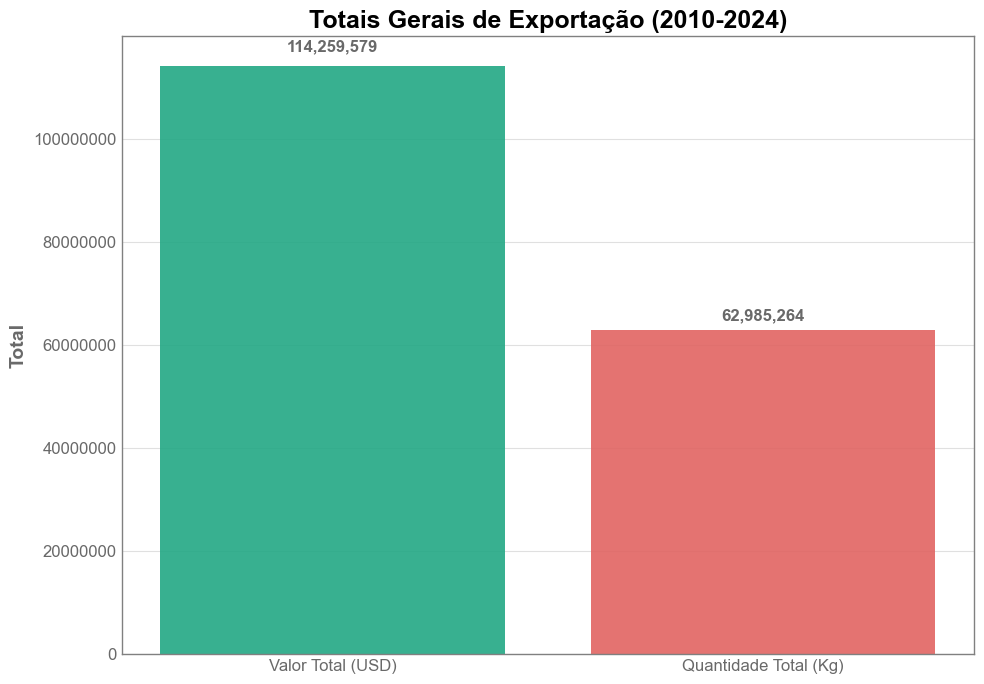

In [100]:

# --- GR√ÅFICO 3: VALOR TOTAL E QUANTIDADE TOTAL (Mantido como estava, se n√£o houver outra instru√ß√£o) ---
# Se este gr√°fico tamb√©m deve ser branco, as configura√ß√µes de estilo globais (acima) j√° o afetar√£o.
# No entanto, se precisar de ajustes espec√≠ficos para este √∫nico gr√°fico, eles devem ser feitos AQUI.
# Por exemplo, se quiser cores de barra espec√≠ficas para o total, ajuste 'colors_for_total_bars'.
fig2, ax2 = plt.subplots(figsize=(10, 7)) # Tamanho para um √∫nico gr√°fico
# ax2.set_facecolor('black') # N√£o precisa se plt.style.use('seaborn-v0_8-whitegrid') j√° est√° ativo.

# Dados para o gr√°fico de totais
labels = ['Valor Total (USD)', 'Quantidade Total (Kg)']
totals = [valor_total_geral, quantidade_total_geral]

# Definindo as cores para as barras totais com base nas paletas de cores tecnol√≥gicas
# Estas cores foram baseadas em paletas para fundo escuro. Para fundo branco, podemos reajustar.
# Exemplo: usar as cores mais escuras das paletas viridis e plasma
color_total_value_light_bg = plt.cm.viridis(0.6) # Ex: um azul-verde mais escuro
color_total_quantity_light_bg = plt.cm.plasma(0.6) # Ex: um roxo mais escuro

colors_for_total_bars_light_bg = [color_total_value_light_bg, color_total_quantity_light_bg]

bars = ax2.bar(labels, totals, color=colors_for_total_bars_light_bg, alpha=0.9) # Usando as novas cores
ax2.set_title(f'Totais Gerais de Exporta√ß√£o ({ano_inicial}-{ano_atual})',
              fontsize=18, fontweight='bold', color='black') # T√≠tulo em PRETO
ax2.set_ylabel('Total', fontsize=14, fontweight='semibold', color='dimgray') # R√≥tulo em dimgray
ax2.yaxis.set_major_formatter(formatter_int)
ax2.grid(axis='x', visible=False) # Remove as linhas de grade verticais
ax2.grid(axis='y', linestyle='-', alpha=0.7, color='lightgray') # Mant√©m a grade horizontal suave

# Configura ticks e labels
ax2.tick_params(axis='x', colors='dimgray', labelsize=12) # Ticks em dimgray
ax2.tick_params(axis='y', colors='dimgray', labelsize=12) # Ticks em dimgray


# Adiciona r√≥tulos de valor nas barras (verticais), com tamanho de fonte maior
for bar in bars:
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2, yval + (yval * 0.02), f'{yval:,.0f}',
             ha='center', va='bottom', fontsize=12, color='dimgray', fontweight='bold') # R√≥tulos dos valores em dimgray

plt.tight_layout()
plt.show()

In [101]:


# Configura√ß√µes para exibir todas as linhas e colunas (opcional, para depura√ß√£o)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# --- ASSUMINDO que o DataFrame 'exportacao' J√Å EST√Å CARREGADO E PRONTO. ---
# As colunas esperadas s√£o: 'Pa√≠s', 'Ano', 'Quantidade (kg)', 'Valor_USD'.

# Assegura que 'Ano', 'Quantidade (kg)' e 'Valor_USD' s√£o num√©ricos.
exportacao['Ano'] = pd.to_numeric(exportacao['Ano'], errors='coerce')
exportacao['Quantidade (kg)'] = pd.to_numeric(exportacao['Quantidade (kg)'], errors='coerce')
exportacao['Valor_USD'] = pd.to_numeric(exportacao['Valor_USD'], errors='coerce')

# Remove linhas com valores nulos ap√≥s a convers√£o.
exportacao.dropna(subset=['Ano', 'Quantidade (kg)', 'Valor_USD', 'Pa√≠s'], inplace=True)
exportacao['Ano'] = exportacao['Ano'].astype(int)

# --- Filtrar pelos √∫ltimos 15 anos ---
ano_atual = exportacao['Ano'].max()
ano_inicial = ano_atual - 14

df_recentes = exportacao[exportacao['Ano'] >= ano_inicial].copy()

# --- Agrega os dados por Ano ---
resumo_anual = df_recentes.groupby('Ano').agg(
    Valor_Total=('Valor_USD', 'sum'),
    Quantidade_Total_Kg=('Quantidade (kg)', 'sum')
).reset_index()

# Ordena por ano para garantir que a linha do tempo esteja correta
resumo_anual = resumo_anual.sort_values(by='Ano')

# --- Exibe o resumo agregado por ano (para verifica√ß√£o dos dados) ---
print("\n--- Resumo da Exporta√ß√£o por Ano (√öltimos 15 Anos) ---")
print(resumo_anual.to_markdown(index=False, numalign="left", stralign="left"))


# --- Configura√ß√µes de estilo do Matplotlib para "fundo BRANCO e cores vibrantes" ---
plt.style.use('seaborn-v0_8-whitegrid') # Fundo branco com grade suave
# Ajustar as cores de texto e elementos para serem vis√≠veis no fundo CLARO
plt.rcParams.update({
    'text.color': 'dimgray', # Cor padr√£o do texto
    'axes.labelcolor': 'dimgray', # Cor dos r√≥tulos dos eixos
    'xtick.color': 'dimgray', # Cor dos ticks do eixo X
    'ytick.color': 'dimgray', # Cor dos ticks do eixo Y
    'axes.edgecolor': 'gray', # Borda dos eixos
    'grid.color': 'lightgray', # Cor da grade
    'grid.linestyle': '--', # Estilo da grade
    'figure.figsize': (14, 7), # Tamanho da figura (mantido para este gr√°fico espec√≠fico)
    'font.size': 12,
    'axes.labelsize': 14,
    'axes.titlesize': 18,
})


# Cores vibrantes (ajustadas para fundo claro se necess√°rio, mas as atuais ainda podem funcionar bem)
color_value_line = '#008080'  # Teal (um ciano mais escuro)
color_quantity_line = '#800080' # Purple (um magenta mais escuro)
# Ou manter as originais vibrantes:
# color_value_line = '#00FFFF' # Ciano el√©trico
# color_quantity_line = '#FF00FF' # Magenta vibrante


formatter_int = mticker.FormatStrFormatter('%.0f') # Formatador para n√∫meros inteiros

# --- GR√ÅFICO TEMPORAL: VALOR E QUANTIDADE AO LONGO DO TEMPO ---
fig, ax1 = plt.subplots(figsize=(14, 7)) # Tamanho da figura

# Configura√ß√µes para o eixo Y de Valor (esquerda)
ax1.set_xlabel('Ano', fontsize=14, fontweight='semibold', color='dimgray') # Cor ajustada
ax1.set_ylabel('Valor Total (USD)', color=color_value_line, fontsize=14, fontweight='semibold')
ax1.plot(resumo_anual['Ano'], resumo_anual['Valor_Total'], color=color_value_line,
         marker='o', linestyle='-', linewidth=2.5, markersize=8, label='Valor Total (USD)')
ax1.tick_params(axis='y', labelcolor=color_value_line, labelsize=12)
ax1.tick_params(axis='x', colors='dimgray', labelsize=12) # Cor ajustada
ax1.set_title(f'Tend√™ncia Anual de Exporta√ß√£o: Valor e Quantidade ({ano_inicial}-{ano_atual})',
              fontsize=18, fontweight='bold', color='black') # Cor do t√≠tulo ajustada

# Formata√ß√£o do eixo Y de valor
ax1.yaxis.set_major_formatter(formatter_int)
ax1.grid(axis='y', linestyle=':', alpha=0.6, color='lightgray') # Grade horizontal mais suave e pontilhada
ax1.grid(axis='x', visible=False) # Remove grade vertical

# Criar um segundo eixo Y para a Quantidade (direita)
ax2 = ax1.twinx()
ax2.set_ylabel('Quantidade Total (Kg)', color=color_quantity_line, fontsize=14, fontweight='semibold')
ax2.plot(resumo_anual['Ano'], resumo_anual['Quantidade_Total_Kg'], color=color_quantity_line,
         marker='X', linestyle='--', linewidth=2.5, markersize=8, label='Quantidade Total (Kg)')
ax2.tick_params(axis='y', labelcolor=color_quantity_line, labelsize=12)

# Formata√ß√£o do eixo Y de quantidade
ax2.yaxis.set_major_formatter(formatter_int)

# Configurar ticks do eixo X para mostrar todos os anos, se houver muitos, ou apenas alguns para clareza
if len(resumo_anual['Ano']) > 15: # Se mais de 15 anos, mostra a cada 2 anos
    ax1.set_xticks(resumo_anual['Ano'].iloc[::2])
else: # Se 15 anos ou menos, mostra todos
    ax1.set_xticks(resumo_anual['Ano'])

ax1.set_xlim(resumo_anual['Ano'].min() - 0.5, resumo_anual['Ano'].max() + 0.5) # Garante que os pontos de dados n√£o fiquem na borda

# Adicionar legenda combinada para ambos os eixos
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left', frameon=True,
           fontsize=10, facecolor='white', edgecolor='gray', labelcolor='dimgray') # Fundo branco, borda cinza, texto dimgray

plt.tight_layout() # Ajusta o layout
plt.show()



--- Resumo da Exporta√ß√£o por Ano (√öltimos 15 Anos) ---
| Ano   | Valor_Total   | Quantidade_Total_Kg   |
|:------|:--------------|:----------------------|
| 2010  | 2.5953e+06    | 1.28057e+06           |
| 2011  | 3.61512e+06   | 1.21483e+06           |
| 2012  | 5.52129e+06   | 5.77538e+06           |
| 2013  | 2.27448e+07   | 9.14906e+06           |
| 2014  | 7.4728e+06    | 2.32403e+06           |
| 2015  | 2.76916e+06   | 1.19848e+06           |
| 2016  | 4.4347e+06    | 1.78655e+06           |
| 2017  | 7.13561e+06   | 2.88957e+06           |
| 2018  | 7.48606e+06   | 3.85616e+06           |
| 2019  | 5.93483e+06   | 3.15287e+06           |
| 2020  | 6.07829e+06   | 4.40972e+06           |
| 2021  | 9.85194e+06   | 8.0587e+06            |
| 2022  | 1.09453e+07   | 7.02598e+06           |
| 2023  | 8.92308e+06   | 5.53889e+06           |
| 2024  | 8.75128e+06   | 5.32446e+06           |


In [102]:
# Configura√ß√µes para exibir todas as linhas e colunas (opcional, para depura√ß√£o)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:,.2f}'.format) # Formata n√∫meros float com 2 casas decimais e separador de milhares

# --- ASSUMINDO que o DataFrame 'exportacao' J√Å EST√Å CARREGADO E PRONTO. ---
# As colunas esperadas s√£o: 'Pa√≠s', 'Ano', 'Quantidade (kg)', 'Valor_USD'.

# Assegura que 'Ano', 'Quantidade (kg)' e 'Valor_USD' s√£o num√©ricos.
exportacao['Ano'] = pd.to_numeric(exportacao['Ano'], errors='coerce')
exportacao['Quantidade (kg)'] = pd.to_numeric(exportacao['Quantidade (kg)'], errors='coerce')
exportacao['Valor_USD'] = pd.to_numeric(exportacao['Valor_USD'], errors='coerce')

# Remove linhas com valores nulos ap√≥s a convers√£o.
exportacao.dropna(subset=['Ano', 'Quantidade (kg)', 'Valor_USD', 'Pa√≠s'], inplace=True)
exportacao['Ano'] = exportacao['Ano'].astype(int)

# --- Filtrar pelos √∫ltimos 15 anos ---
ano_atual = exportacao['Ano'].max()
ano_inicial = ano_atual - 14

df_recentes = exportacao[exportacao['Ano'] >= ano_inicial].copy()

# --- Agrega os dados por Pa√≠s ---
resumo_pais = df_recentes.groupby('Pa√≠s').agg(
    Valor_Total=('Valor_USD', 'sum'),
    Quantidade_Total_Kg=('Quantidade (kg)', 'sum')
).sort_values(by='Valor_Total', ascending=False).reset_index() # Ordena por Valor_Total para pegar os top pa√≠ses

# --- Prepara os dados para o gr√°fico de maiores exporta√ß√µes ---
n_top_paises_graph = 10 # N√∫mero de pa√≠ses para exibir no gr√°fico
top_paises_para_graph = resumo_pais.head(n_top_paises_graph).copy()

# --- Configura√ß√µes de estilo do Matplotlib para "fundo BRANCO e cores vibrantes" ---
# Usar 'seaborn-v0_8-whitegrid' para um fundo branco com grade suave.
plt.style.use('seaborn-v0_8-whitegrid') 

# Ajustar a cor do texto e elementos para ser vis√≠vel no fundo CLARO
plt.rcParams['text.color'] = 'dimgray' # Texto geral em cinza escuro
plt.rcParams['axes.labelcolor'] = 'dimgray' # R√≥tulos dos eixos em cinza escuro
plt.rcParams['xtick.color'] = 'dimgray' # Ticks do eixo X em cinza escuro
plt.rcParams['ytick.color'] = 'dimgray' # Ticks do eixo Y em cinza escuro
plt.rcParams['axes.edgecolor'] = 'gray' # Borda dos eixos em cinza
plt.rcParams['grid.color'] = 'lightgray' # Cor da grade (mais suave)
plt.rcParams['grid.linestyle'] = '-' # Estilo da grade (cont√≠nua)

# Paletas de cores para fundo CLARO (ajustadas)
# Viridis e Plasma s√£o boas, mas para fundo branco, as cores iniciais s√£o claras.
# Podemos pegar cores um pouco mais escuras das paletas ou usar outras.
# Vou usar as mesmas cores do gr√°fico temporal para consist√™ncia com o estilo "tecnol√≥gico" em fundo branco.
color_valor = '#008080'  # Teal (um ciano mais escuro)
color_quantidade = '#800080' # Purple (um magenta mais escuro)

formatter_int = mticker.FormatStrFormatter('%.0f') # Formata n√∫meros como inteiros

# --- GR√ÅFICO COMBINADO: MAIORES EXPORTA√á√ïES (Valor e Quantidade) ---
fig, ax = plt.subplots(figsize=(16, 10)) # Tamanho da figura para o gr√°fico combinado
fig.suptitle(f'Maiores Exporta√ß√µes por Pa√≠s ({ano_inicial}-{ano_atual})',
             fontsize=20, fontweight='bold', color='black', y=1.02) # T√≠tulo da figura em PRETO

# Definir a largura das barras e o espa√ßamento para barras agrupadas
bar_height = 0.35
r1 = np.arange(len(top_paises_para_graph['Pa√≠s']))
r2 = [x + bar_height for x in r1]

# Barras para Valor Total (USD)
bars_valor = ax.barh(r1, top_paises_para_graph['Valor_Total'], height=bar_height,
                     color=color_valor, label='Valor Total (USD)', alpha=0.8)

# Barras para Quantidade Total (Kg)
bars_quantidade = ax.barh(r2, top_paises_para_graph['Quantidade_Total_Kg'], height=bar_height,
                          color=color_quantidade, label='Quantidade Total (Kg)', alpha=0.8)

ax.set_xlabel('Valor / Quantidade', fontsize=14, fontweight='semibold', color='dimgray') # R√≥tulos em dimgray
ax.set_ylabel('Pa√≠s', fontsize=14, fontweight='semibold', color='dimgray') # R√≥tulos em dimgray
ax.set_title(f'Top {n_top_paises_graph} Pa√≠ses por Valor e Quantidade de Exporta√ß√£o',
             fontsize=16, fontweight='bold', color='black') # T√≠tulo em PRETO

# Configurar r√≥tulos do eixo Y (nomes dos pa√≠ses)
ax.set_yticks([r + bar_height/2 for r in r1])
ax.set_yticklabels(top_paises_para_graph['Pa√≠s'], fontsize=12, color='dimgray') # R√≥tulos dos pa√≠ses em dimgray
ax.invert_yaxis() # Maior valor no topo

# Configura ticks do eixo X
ax.tick_params(axis='x', colors='dimgray', labelsize=12) # Ticks em dimgray
ax.tick_params(axis='y', length=0) # Remove os marcadores do eixo Y

ax.xaxis.set_major_formatter(formatter_int) # Formata n√∫meros como inteiros

# Adiciona r√≥tulos de valor nas barras
for bar in bars_valor:
    width = bar.get_width()
    ax.text(width + (ax.get_xlim()[1] * 0.005), bar.get_y() + bar.get_height()/2,
            f'{width:,.0f}', va='center', ha='left', fontsize=9, color='dimgray') # R√≥tulos dos valores em dimgray

for bar in bars_quantidade:
    width = bar.get_width()
    ax.text(width + (ax.get_xlim()[1] * 0.005), bar.get_y() + bar.get_height()/2,
            f'{width:,.0f}', va='center', ha='left', fontsize=9, color='dimgray') # R√≥tulos dos valores em dimgray

ax.legend(fontsize=10, facecolor='white', edgecolor='gray', labelcolor='dimgray') # Legenda em dimgray
ax.grid(axis='x', linestyle='--', alpha=0.7, color='lightgray') # Grade horizontal em cinza claro
ax.grid(axis='y', visible=False) # Remove linhas de grade verticais para n√£o cortar os nomes

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Ajusta o layout
plt.show()

# --- Totais Gerais (apenas para refer√™ncia, em formato de tabela) ---
# Se voc√™ quiser exibir esta tabela tamb√©m:
# print(f"\n--- Totais Gerais de Exporta√ß√£o ({ano_inicial}-{ano_atual}) ---")
# valor_total_geral = resumo_pais['Valor_Total'].sum()
# quantidade_total_geral = resumo_pais['Quantidade_Total_Kg'].sum()
# print(f"Valor Total Geral: {valor_total_geral:,.2f} USD")
# print(f"Quantidade Total Geral: {quantidade_total_geral:,.2f} Kg")
